In [218]:
from sklearn.cluster import KMeans,DBSCAN
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [ ]:
from google.colab import files
uploaded = files.upload()
df = pd.read_csv("Credit Card Customer Data.csv")
df.head()

Saving Credit Card Customer Data.csv to Credit Card Customer Data (3).csv


,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [ ]:
df.drop(['Sl_No','Customer Key'] , axis = 1 , inplace = True)


In [201]:
df1 = pd.DataFrame(df, columns=['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made'])
df1


,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3
...,...,...,...,...,...
655,99000,10,1,10,0
656,84000,10,1,13,2
657,145000,8,1,9,1
658,172000,10,1,15,0


In [202]:
scaler = MinMaxScaler()
df1 = scaler.fit_transform(df[['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']])
df1

array([[0.49238579, 0.11111111, 0.2       , 0.06666667, 0.        ],
       [0.23857868, 0.22222222, 0.        , 0.66666667, 0.9       ],
       [0.23857868, 0.66666667, 0.2       , 0.2       , 0.4       ],
       ...,
       [0.72081218, 0.77777778, 0.2       , 0.6       , 0.1       ],
       [0.85786802, 1.        , 0.2       , 1.        , 0.        ],
       [0.83248731, 0.88888889, 0.        , 0.8       , 0.2       ]])

In [203]:
df1 = pd.DataFrame(df1, columns=['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made'])
df1

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,0.492386,0.111111,0.2,0.066667,0.0
1,0.238579,0.222222,0.0,0.666667,0.9
2,0.238579,0.666667,0.2,0.200000,0.4
3,0.137056,0.444444,0.2,0.066667,0.4
4,0.492386,0.555556,0.0,0.800000,0.3
...,...,...,...,...,...
655,0.487310,1.000000,0.2,0.666667,0.0
656,0.411168,1.000000,0.2,0.866667,0.2
657,0.720812,0.777778,0.2,0.600000,0.1
658,0.857868,1.000000,0.2,1.000000,0.0


In [204]:
df2 = df1.iloc[:,[1,2]].values
df2

array([[0.11111111, 0.2       ],
       [0.22222222, 0.        ],
       [0.66666667, 0.2       ],
       ...,
       [0.77777778, 0.2       ],
       [1.        , 0.2       ],
       [0.88888889, 0.        ]])

In [ ]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k, random_state= 42)
    km.fit(df2)
    sse.append(km.inertia_)

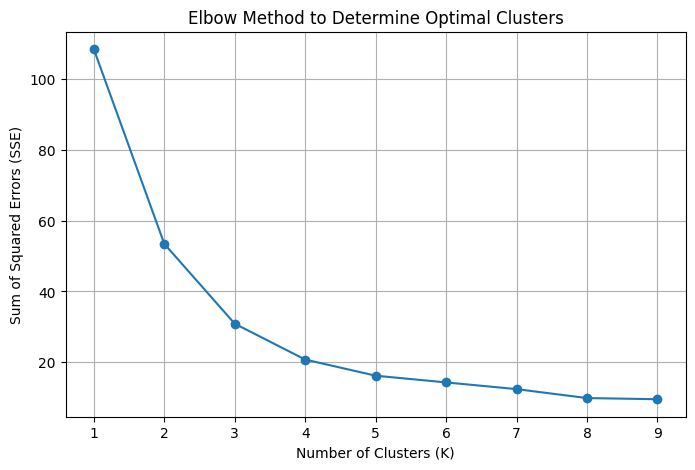

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(k_rng, sse, marker='o')
plt.title('Elbow Method to Determine Optimal Clusters')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.grid()
plt.show()

In [207]:
km = KMeans(n_clusters=3)
y_kmeans = km.fit_predict(df2)
df['cluster'] = y_kmeans

In [210]:
df.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,cluster
0,100000,2,1,1,0,1
1,50000,3,0,10,9,1
2,50000,7,1,3,4,2
3,30000,5,1,1,4,1
4,100000,6,0,12,3,2


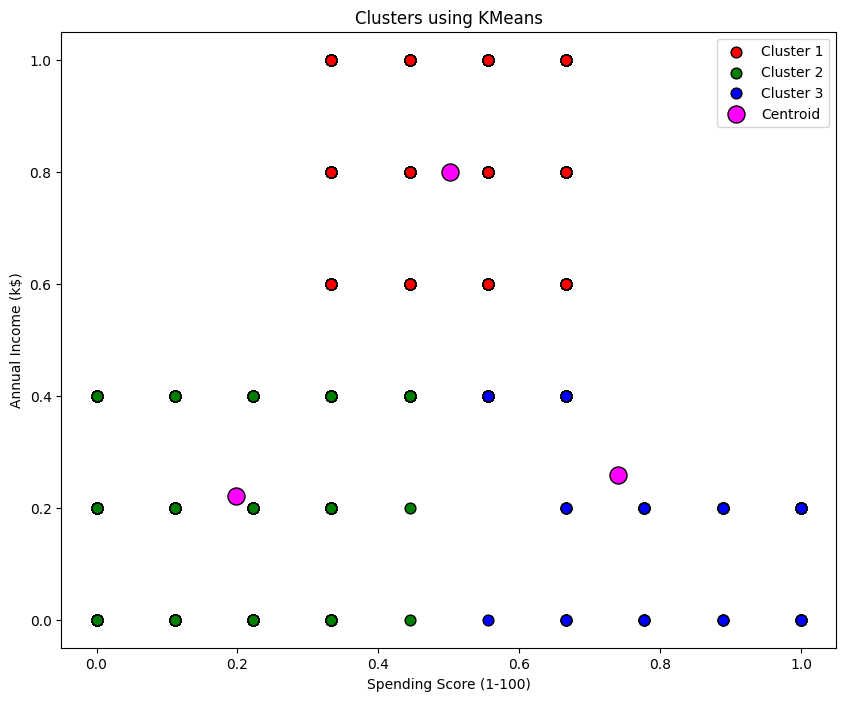

In [208]:
fig = plt.figure(figsize=(10, 8))
plt.scatter(df2[y_kmeans == 0, 0], df2[y_kmeans == 0, 1], color='red', s=60, label='Cluster 1', edgecolors='black')
plt.scatter(df2[y_kmeans == 1, 0], df2[y_kmeans == 1, 1], color='green', s=60, label='Cluster 2', edgecolors='black')
plt.scatter(df2[y_kmeans == 2, 0], df2[y_kmeans == 2, 1], color='blue', s=60, label='Cluster 3', edgecolors='black')

# cluster centres
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color='magenta', s=150, label='Centroid',edgecolors='black')
plt.legend()
plt.title('Clusters using KMeans')
plt.ylabel('Total_Credit_Cards')
plt.xlabel('Total_visits_bank')
plt.show()

In [ ]:
plt.scatter(df)

In [291]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(df1, df['cluster'])
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.4129828696029572


In [285]:
dbscan = DBSCAN(eps=0.2, min_samples=5)
dbscan_labels = dbscan.fit_predict(df2)

In [286]:
df['dbscan_cluster'] = dbscan_labels

In [287]:
# Check for the number of clusters (excluding noise points, which are labeled as -1)
n_clusters_dbscan = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise_dbscan = list(dbscan_labels).count(-1)
print(f"DBSCAN found {n_clusters_dbscan} clusters and {n_noise_dbscan} noise points.")

DBSCAN found 2 clusters and 0 noise points.


In [288]:
if n_clusters_dbscan > 1:
    silhouette_avg_dbscan = silhouette_score(df2, dbscan_labels)
    print(f"Silhouette Score for DBSCAN: {silhouette_avg_dbscan}")
else:
    print("Silhouette Score not calculated (less than 2 clusters).")

Silhouette Score for DBSCAN: 0.46279309916966765


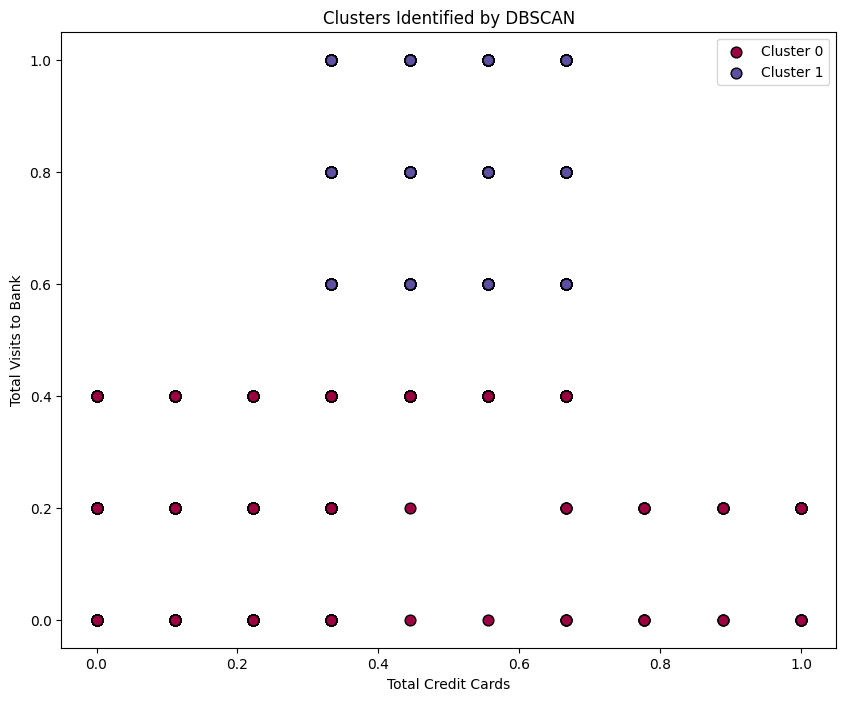

In [290]:
plt.figure(figsize=(10, 8))
unique_labels = set(dbscan_labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
for label, color in zip(unique_labels, colors):
    if label == -1:  # Noise points
        color = 'k'  # Black for noise
    mask = dbscan_labels == label
    plt.scatter(df2[mask, 0], df2[mask, 1], s=60, c=[color], label=f'Cluster {label}' if label != -1 else 'Noise', edgecolors='black')
plt.title('Clusters Identified by DBSCAN')
plt.xlabel('Total Credit Cards')
plt.ylabel('Total Visits to Bank')
plt.legend()
plt.show()